# Forecasting

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col="Month", parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
train_data, test_data = df.iloc[:108], df.iloc[108:]

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
fitted_model = ExponentialSmoothing(
    train_data['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit()

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [9]:
test_predictions = fitted_model.forecast(36)

In [10]:
test_predictions

1958-01-01    356.739143
1958-02-01    343.561234
1958-03-01    403.996804
1958-04-01    397.853537
1958-05-01    406.415919
1958-06-01    479.824369
1958-07-01    529.820371
1958-08-01    524.772030
1958-09-01    454.714920
1958-10-01    391.965458
1958-11-01    345.259663
1958-12-01    395.243838
1959-01-01    407.506420
1959-02-01    392.453174
1959-03-01    461.489283
1959-04-01    454.471773
1959-05-01    464.252661
1959-06-01    548.107812
1959-07-01    605.218708
1959-08-01    599.451941
1959-09-01    519.425056
1959-10-01    447.745766
1959-11-01    394.393305
1959-12-01    451.490690
1960-01-01    465.498351
1960-02-01    448.302888
1960-03-01    527.163474
1960-04-01    519.147307
1960-05-01    530.320106
1960-06-01    626.108620
1960-07-01    691.346924
1960-08-01    684.759493
1960-09-01    593.344043
1960-10-01    511.464127
1960-11-01    450.519118
1960-12-01    515.741989
Freq: MS, dtype: float64

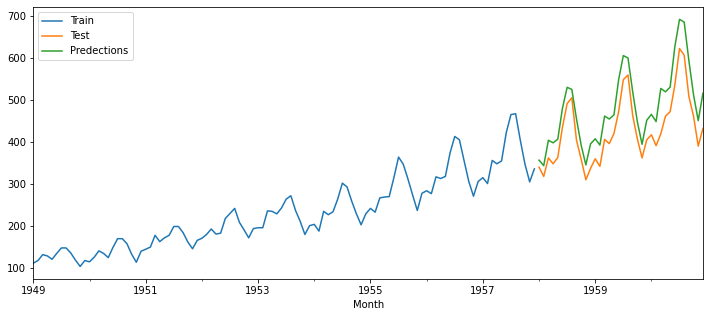

In [11]:
train_data['Thousands of Passengers'].plot(
    legend=True, label="Train", figsize=(12,5)
)
test_data['Thousands of Passengers'].plot(
    legend=True, label="Test", figsize=(12,5)
)
test_predictions.plot(
    legend=True, label="Predections", figsize=(12,5)
)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
mean_absolute_error(test_data, test_predictions)

53.16361991340851

In [16]:
mean_squared_error(test_data, test_predictions)

3200.583445912333

In [17]:
np.sqrt(mean_squared_error(test_data, test_predictions))

56.57369924189449

 we need to scale error because this one doesnt day everything

In [18]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


To use arima models get rid of trends and seasonal components, the simples way to remove them is simple diffence, so in 2 weeks we will begin our lecture on arima models witha a sghort introductino on removing non stationarities in tiemseries.